## Chapter 6

### Section 6.2: The Array

In [2]:
import numpy as np

array1 = np.array([])
array1

array([], dtype=float64)

In [3]:
array1 = np.array([1,2,3])
array2 = np.array([[2,3,4],[5,6,7],[3,0,4]])

In [4]:
array1

array([1, 2, 3])

In [5]:
array2

array([[2, 3, 4],
       [5, 6, 7],
       [3, 0, 4]])

In [6]:
print(array1.shape)
print(array2.shape)

(3,)
(3, 3)


In [7]:
array1.dtype

dtype('int64')

In [8]:
array1 = np.array([1.,2.,3.])
array1.dtype

dtype('float64')

In [9]:
array1 = np.array([1,2,3]).astype(float)
array1.dtype

dtype('float64')

In [10]:
array1.astype(str)

array(['1.0', '2.0', '3.0'], dtype='<U32')

In [11]:
array2.size

9

In [12]:
array2.ndim

2

In [13]:
print(array2)
print(array2.T)

[[2 3 4]
 [5 6 7]
 [3 0 4]]
[[2 5 3]
 [3 6 0]
 [4 7 4]]


In [14]:
array2.flatten()

array([2, 3, 4, 5, 6, 7, 3, 0, 4])

In [15]:
print(array2.argmin())
print(array2.argmax())

7
5


In [16]:
array2[7]

IndexError: index 7 is out of bounds for axis 0 with size 3

In [17]:
array2.flatten()[array2.argmin()]

np.int64(0)

In [18]:
np.min(array2)

np.int64(0)

In [19]:
array3 = np.array([5,6,7,8,9,10,11,12,13,14,15,16]).astype(float).reshape(3,4)
array3

array([[ 5.,  6.,  7.,  8.],
       [ 9., 10., 11., 12.],
       [13., 14., 15., 16.]])

In [20]:
array3.reshape(4,3)

array([[ 5.,  6.,  7.],
       [ 8.,  9., 10.],
       [11., 12., 13.],
       [14., 15., 16.]])

In [21]:
array3.reshape(2,4)

ValueError: cannot reshape array of size 12 into shape (2,4)

In [22]:
array3.diagonal()

array([ 5., 10., 15.])

### Section 6.3: Precision

In [23]:
import numpy as np

print(int(np.float32(123456789)))

123456792


In [24]:
print(int(np.float64(123456789)))

123456789


In [25]:
np.float64(0.0024757564245)

np.float64(0.0024757564245)

In [26]:
np.float32(0.0024757564245)

np.float32(0.0024757565)

### Section 6.5: Research Example: An Exoplanet Transit

In [27]:
import numpy as np
from astropy.io import fits

imlist = []
jd = []
for i in range(1237):
    fn = fr'C:\Users\Jin\Downloads\BookDatasets\Tess\HAT-P-11\{i}.fits'
    imlist.append(fits.getdata(fn))
    jd.append(fits.getheader(fn)['btjd'])
imlist = np.array(imlist)
jd = np.array(jd)

In [28]:
print(jd)
print(jd.shape)
print(imlist.shape)

[1683.36712646 1683.38800049 1683.40881348 ... 1710.13824463 1710.15905762
 1710.17987061]
(1237,)
(1237, 20, 20)


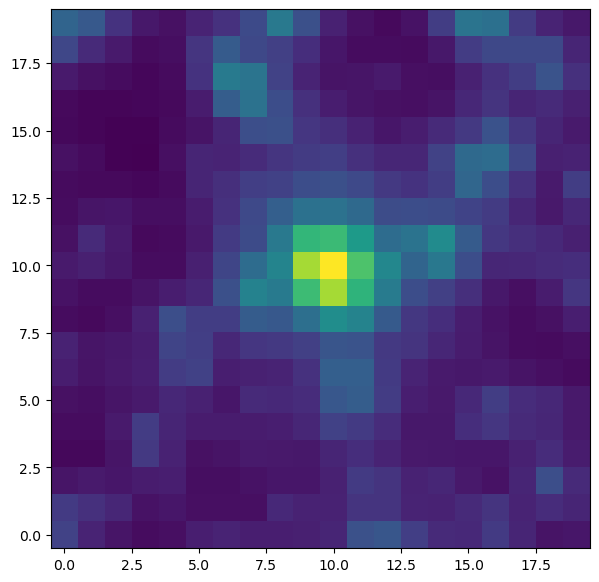

In [29]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
ax.imshow(np.log10(imlist[0]), origin='lower')

In [30]:
subarray = imlist[0:2, :3, :3]

evenimages = imlist[::2]
center = 10
central_images = evenimages[:, center-2:center+3, center-2:center+3]

In [31]:
l = [1, 2, 3, 4]
np.sum(l)

np.int64(10)

In [32]:
np.sum(imlist)

np.float32(203091860.0)

In [33]:
cropped_array = imlist[:, 8:13, 8:13]

np.sum(cropped_array, axis=0).shape

(5, 5)

In [34]:
flux = np.sum(cropped_array, axis=(1,2))
flux.shape

(1237,)

In [35]:
print("jd:", jd.min(), jd.max())
print("flux:", flux.min(), flux.max())


jd: 1683.3671264648438 1710.1798706054688
flux: 64545.7 69676.664


Text(0, 0.5, 'Flux')

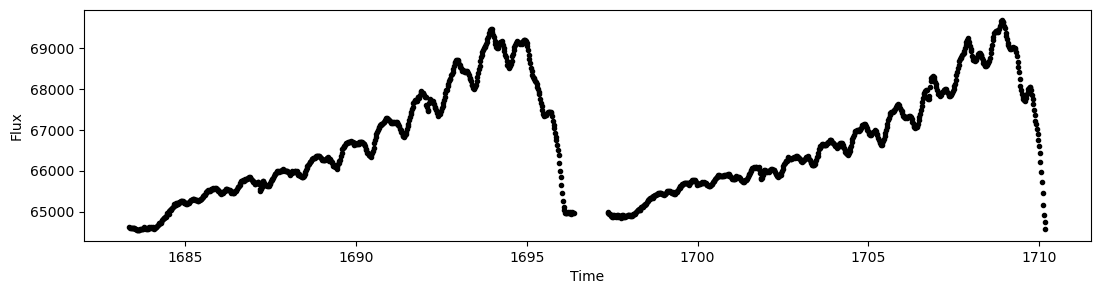

In [36]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(jd, flux, 'k.')
ax.set_xlabel('Time')
ax.set_ylabel('Flux')

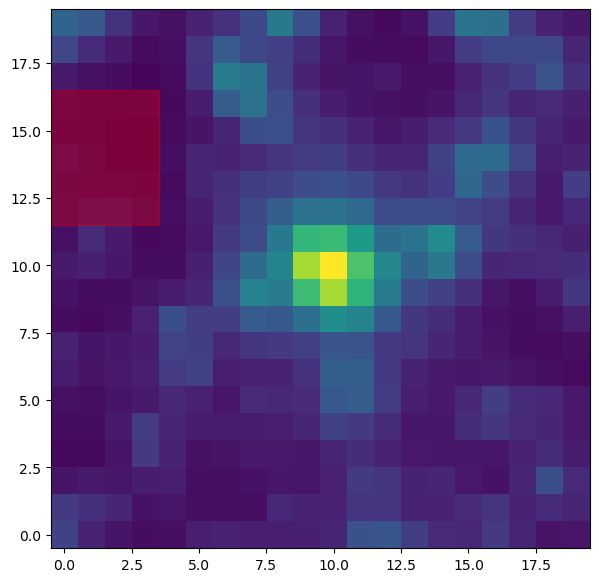

In [37]:
bg = imlist[:, 0:4, 12:17]
fig, ax = plt.subplots(figsize=(7,7))
ax.imshow(np.log10(imlist[0]), origin='lower')
ax.fill_between([-0.5, 3.5], 11.5, 16.5, color='r', alpha=0.3)

Text(0, 0.5, 'Flux (background)')

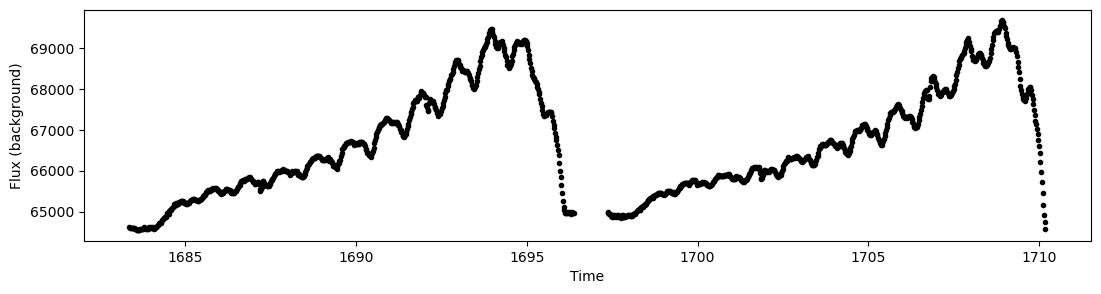

In [38]:
flux_bg = np.sum(bg, axis=(1,2))
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(jd, flux, 'k.')
ax.set_xlabel('Time')
ax.set_ylabel('Flux (background)')

In [39]:
mean_bg = np.mean(bg, axis=(1,2))
flux_minus_bg = flux - mean_bg*cropped_array[0].size

Text(0.5, 1.0, 'Light Curve')

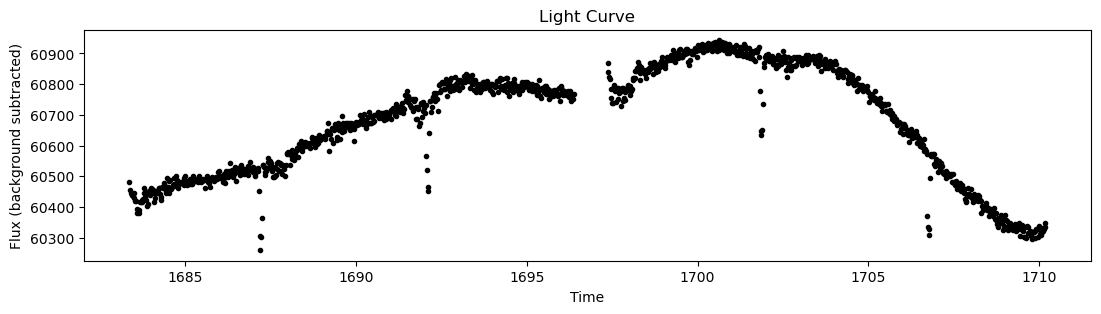

In [40]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(jd, flux_minus_bg, 'k.')
ax.set_xlabel('Time')
ax.set_ylabel('Flux (background subtracted)')
ax.set_title('Light Curve')

Text(0, 0.5, 'Flux (background subtracted')

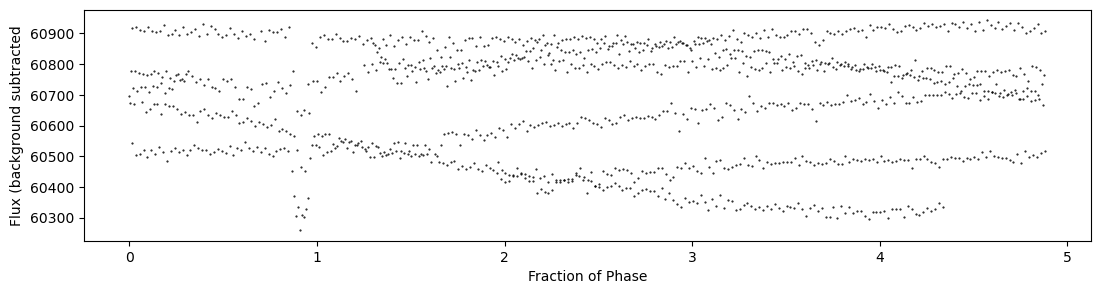

In [41]:
period_days = 4.887802443
folded_time = (jd % period_days)
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(folded_time, flux_minus_bg, 'k.', ms=1)
ax.set_xlabel('Fraction of Phase')
ax.set_ylabel('Flux (background subtracted')

Text(0, 0.5, 'Folded Time')

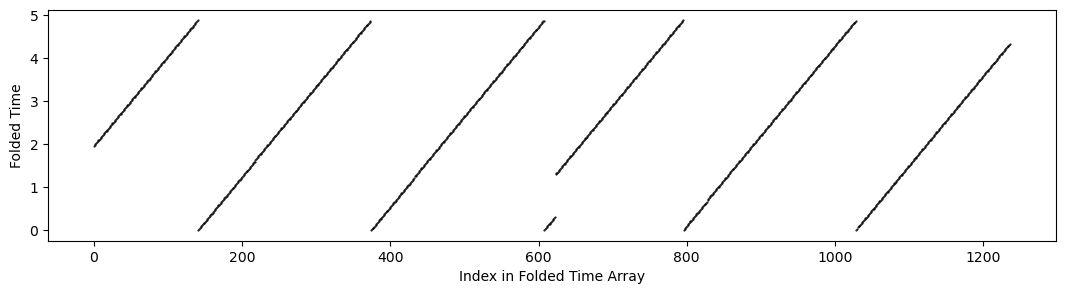

In [42]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(folded_time, 'k.', ms=1)
ax.set_xlabel('Index in Folded Time Array')
ax.set_ylabel('Folded Time')

Text(0, 0.5, 'Difference from element to element')

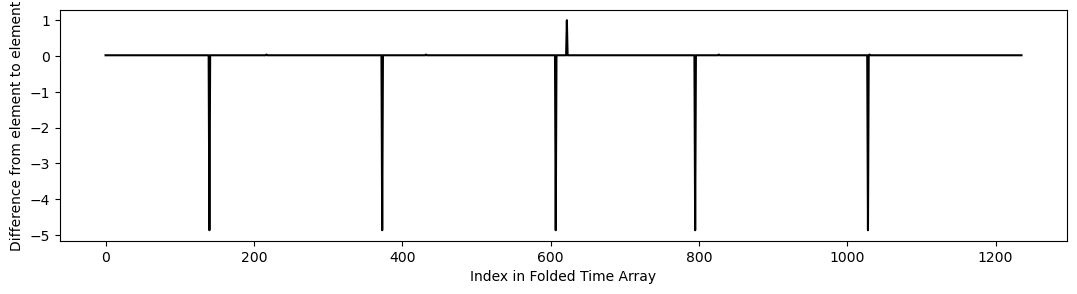

In [43]:
difference_array = folded_time[1:] - folded_time[:-1]
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(difference_array, color='k', ms=1)
ax.set_xlabel('Index in Folded Time Array')
ax.set_ylabel('Difference from element to element')

In [44]:
ind, = np.where(difference_array<0)
ind

array([ 140,  373,  607,  795, 1028])

In [45]:
print(folded_time[140])
print(folded_time[141])

4.879834119718751
0.012844665000001143


In [46]:
composite_array = np.array([folded_time, flux_minus_bg])
chunk1 = composite_array[:, :141]
chunk2 = composite_array[:, 141:374]
chunk3 = composite_array[:, 374:608]
chunk4 = composite_array[:, 608:796]
chunk5 = composite_array[:, 796:1029]
chunk6 = composite_array[:, 1029:]

Text(0, 0.5, 'Flux')

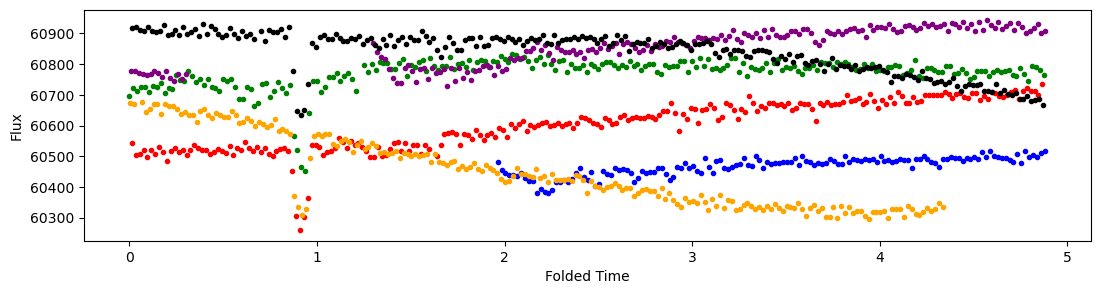

In [49]:
fig, ax = plt.subplots(figsize=(13,3))
ax.plot(chunk1[0], chunk1[1], '.', color='blue')
ax.plot(chunk2[0], chunk2[1], '.', color='red')
ax.plot(chunk3[0], chunk3[1], '.', color='green')
ax.plot(chunk4[0], chunk4[1], '.', color='purple')
ax.plot(chunk5[0], chunk5[1], '.', color='black')
ax.plot(chunk6[0], chunk6[1], '.', color='orange')

ax.set_xlabel('Folded Time')
ax.set_ylabel('Flux')

Text(0, 0.5, 'Flux')

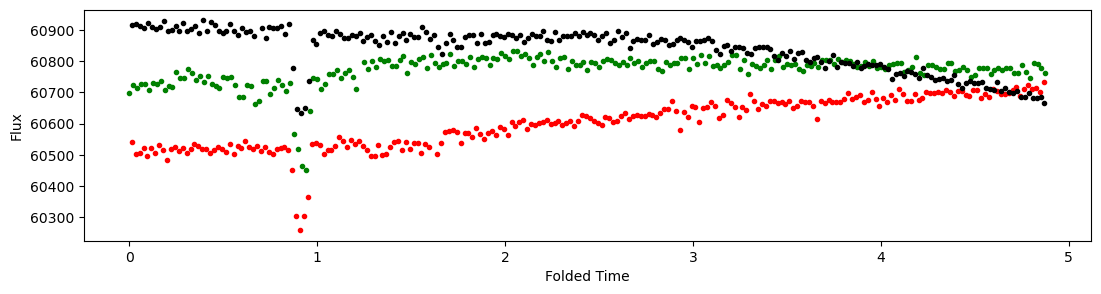

In [50]:
fig, ax = plt.subplots(figsize=(13,3))

ax.plot(chunk2[0], chunk2[1], '.', color='red')
ax.plot(chunk3[0], chunk3[1], '.', color='green')
ax.plot(chunk5[0], chunk5[1], '.', color='black')

ax.set_xlabel('Folded Time')
ax.set_ylabel('Flux')

(0.6, 1.2)

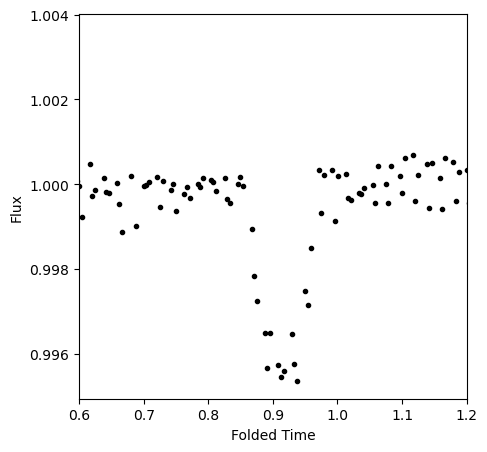

In [55]:
chunk2_norm = chunk2[1] / np.mean(chunk2[1, :20])
chunk3_norm = chunk3[1] / np.mean(chunk3[1, :20])
chunk5_norm = chunk5[1] / np.mean(chunk5[1, :20])

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(chunk2[0], chunk2_norm, '.', color='black')
ax.plot(chunk3[0], chunk3_norm, '.', color='black')
ax.plot(chunk5[0], chunk5_norm, '.', color='black')

ax.set_xlabel('Folded Time')
ax.set_ylabel('Flux')
ax.set_xlim(0.6, 1.2)

In [93]:
final_transit_fluxes = np.concatenate([chunk2_norm, chunk3_norm, chunk5_norm])
final_transit_times = np.concatenate([chunk2[0], chunk3[0], chunk5[0]])
final_transit = np.array([final_transit_times, final_transit_fluxes]).T

In [99]:
print(final_transit.shape)         # Should be (N, 2)
print(final_transit[:5])

(700, 2)
[[0.01284467 1.00042091]
 [0.03365765 0.99979808]
 [0.05453168 0.99983629]
 [0.07534467 1.00006783]
 [0.09615765 0.99968615]]


Text(0, 0.5, 'folded times')

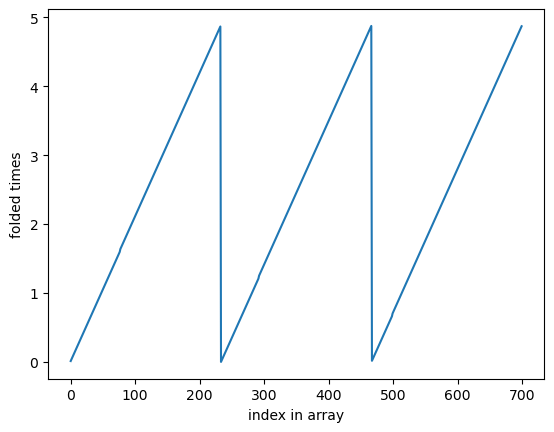

In [94]:
fig, ax = plt.subplots()
ax.plot(final_transit_times)
ax.set_xlabel('index in array')
ax.set_ylabel('folded times')

Text(0, 0.5, 'folded time')

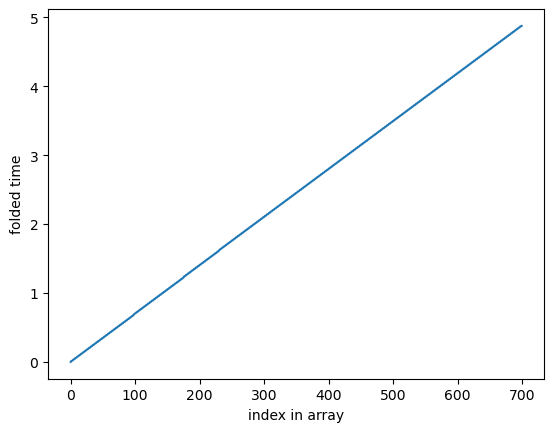

In [95]:
final_transit_sorted = final_transit[final_transit[:,0].argsort()]
fig, ax = plt.subplots()
ax.plot(final_transit_sorted[:, 0])
ax.set_xlabel('index in array')
ax.set_ylabel('folded time')

(0.6, 1.5)

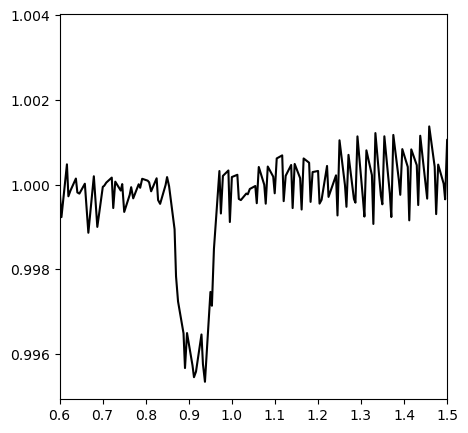

In [96]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(final_transit_sorted[:, 0], final_transit_sorted[:, 1], color='k')
ax.set_xlim(0.6, 1.5)

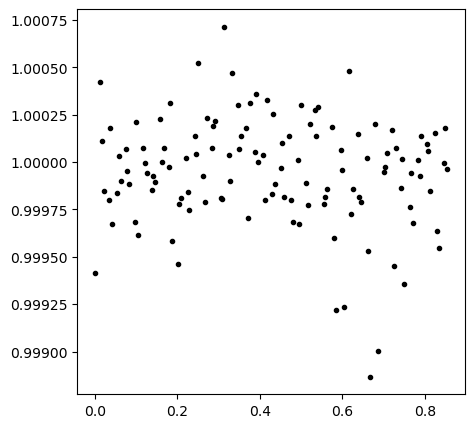

In [100]:
beginning_elements = final_transit_sorted[:123, :]
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(beginning_elements[:, 0], beginning_elements[:, 1], '.', color='k')

In [101]:
std = np.std(beginning_elements[:, 1])
print(f'Noise: {std}')

Noise: 0.00028693376279735226


In [91]:
0.005/std

np.float64(0.010125800504603327)